In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("murtozalikhon/brain-tumor-multimodal-image-ct-and-mri")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri/versions/1


In [65]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [4]:
os.listdir('/root/.cache/kagglehub/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri/versions/1')

['Dataset']

In [5]:
os.listdir('/root/.cache/kagglehub/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri/versions/1/Dataset')

['Brain Tumor CT scan Images', 'Brain Tumor MRI images']

In [6]:
os.listdir('/root/.cache/kagglehub/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri/versions/1/Dataset/Brain Tumor MRI images')

['MRI image source.txt', 'Healthy', 'Tumor']

In [7]:
listdir_list = os.listdir('/root/.cache/kagglehub/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri/versions/1/Dataset/Brain Tumor MRI images')
class_names = listdir_list[1: len(listdir_list)]
print('Class names are:', class_names)

Class names are: ['Healthy', 'Tumor']


In [8]:
images, labels = [], []
for i in class_names:
  for j in os.listdir(os.path.join('/root/.cache/kagglehub/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri/versions/1/Dataset/Brain Tumor MRI images', i)):
    path = os.path.join('/root/.cache/kagglehub/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri/versions/1/Dataset/Brain Tumor MRI images', i, j)
    img = cv2.imread(path)
    if img is None:
      print(path)
    else:
      resized_img = cv2.resize(img, (80, 80))
      images.append(resized_img)
      labels.append(i)

In [9]:
print('Number of images in the dataset is:', len(images))
print('Number of classes in the dataset is:', len(class_names))
print('The classes in the dataset are:', class_names)

Number of images in the dataset is: 5000
Number of classes in the dataset is: 2
The classes in the dataset are: ['Healthy', 'Tumor']


In [10]:
X, y = shuffle(images, labels, random_state = 101)

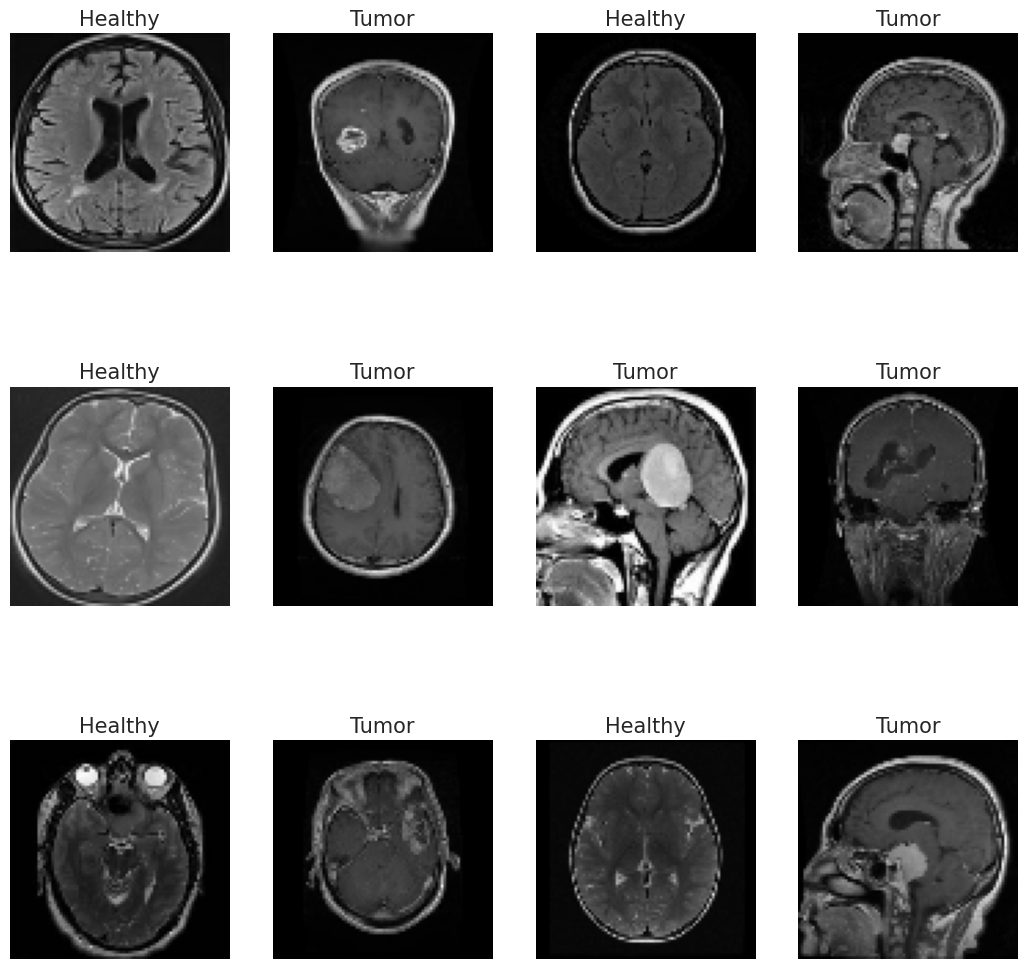

In [11]:
plt.figure(figsize = (13, 13))
for i in range(12):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(X[i])
  plt.title(y[i], fontsize = 15)
  plt.axis('off')

In [12]:
def image_segmentation(img):
  img_reshaped = img.reshape((-1, 3))
  img_float = np.float32(img_reshaped)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  retval, labels, centers = cv2.kmeans(img_float, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_data = segmented_data.reshape((img.shape))
  return segmented_data

array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)
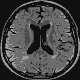

In [13]:
image_segmentation(X[0])

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       ...,

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)
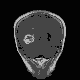

In [14]:
image_segmentation(X[1])

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]], dtype=uint8)
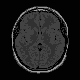

In [15]:
image_segmentation(X[2])

array([[[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]]], dtype=uint8)
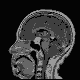

In [16]:
image_segmentation(X[3])

In [17]:
type(X)

list

In [18]:
X_np = np.array(X)

In [19]:
X_seg2 = [image_segmentation(i) for i in X_np]

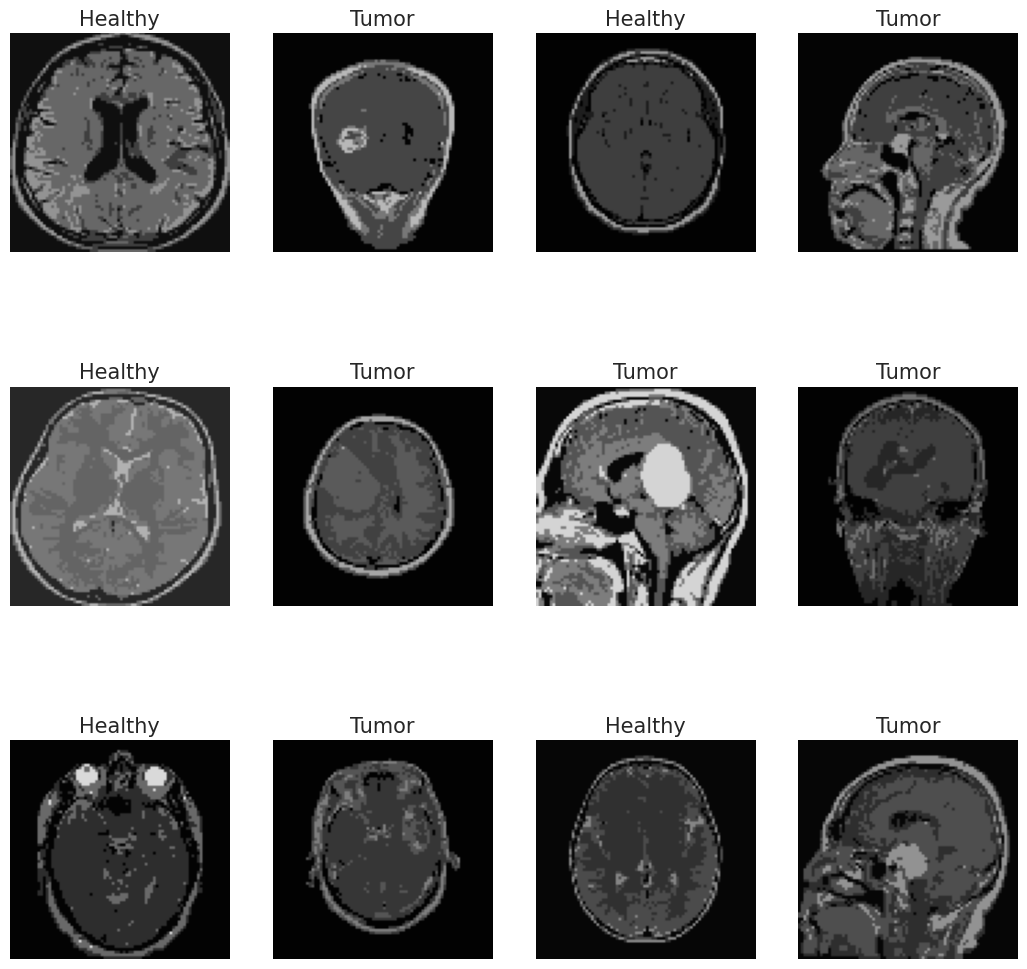

In [20]:
plt.figure(figsize = (13, 13))
for i in range(12):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(X_seg2[i])
  plt.title(y[i], fontsize = 15)
  plt.axis('off')

In [21]:
df_label = pd.DataFrame({
    'label' : y
})

In [22]:
df_label.head()

,label
0,Healthy
1,Tumor
2,Healthy
3,Tumor
4,Healthy


In [23]:
print('The number of labels in the dataset is:', df_label['label'].nunique())
print('The labels in the dataset is:', df_label['label'].unique())
print('The data distribution in each classes is:\n',df_label['label'].value_counts())

The number of labels in the dataset is: 2
The labels in the dataset is: ['Healthy' 'Tumor']
The data distribution in each classes is:
 label
Tumor      3000
Healthy    2000
Name: count, dtype: int64


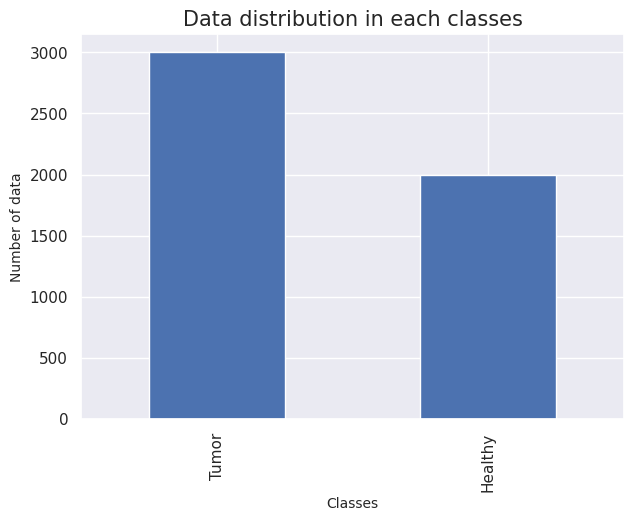

In [24]:
df_label['label'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution in each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [25]:
le = LabelEncoder()

In [26]:
y_le = le.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_seg2, y_le, test_size = 0.2, random_state = 101, shuffle = True, stratify = y_le)

In [28]:
print('The size of training set is:', len(X_train))
print('The size of test set is:', len(X_test))

The size of training set is: 4000
The size of test set is: 1000


In [29]:
X_train_np = np.array(X_train)

In [30]:
X_test_np = np.array(X_test)

In [31]:
X_train_scaled = X_train_np / 255

In [33]:
X_test_np = np.array(X_test)

In [34]:
X_test_scaled = X_test_np / 255

In [38]:
X_train[0].shape

(80, 80, 3)

In [55]:
model = Sequential()

In [56]:
model.add(Input(shape = (80, 80, 3)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [57]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [58]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [59]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6389 - loss: 0.6574 - val_accuracy: 0.8025 - val_loss: 0.4316
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8685 - loss: 0.3238 - val_accuracy: 0.8825 - val_loss: 0.3278
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9108 - loss: 0.2411 - val_accuracy: 0.9175 - val_loss: 0.2199
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9418 - loss: 0.1597 - val_accuracy: 0.9525 - val_loss: 0.1376
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9692 - loss: 0.0979 - val_accuracy: 0.9650 - val_loss: 0.1333
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9797 - loss: 0.0605 - val_accuracy: 0.9750 - val_loss: 0.0960
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9823 - loss: 0.0536 - val_accuracy: 0.9850 - val_loss: 0.0963
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9902 - loss: 0.0291 - val_acc

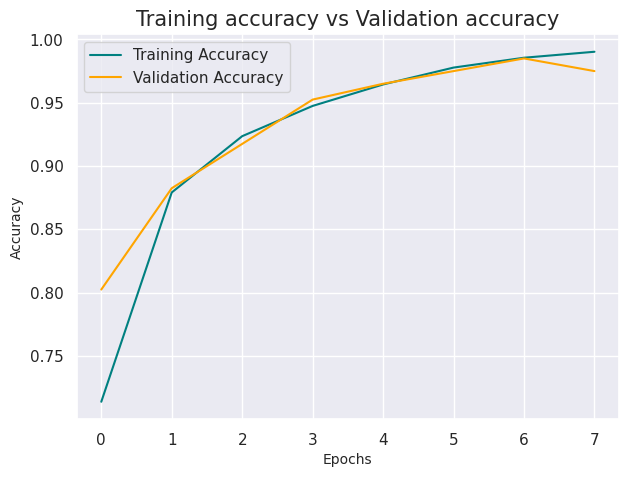

In [60]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

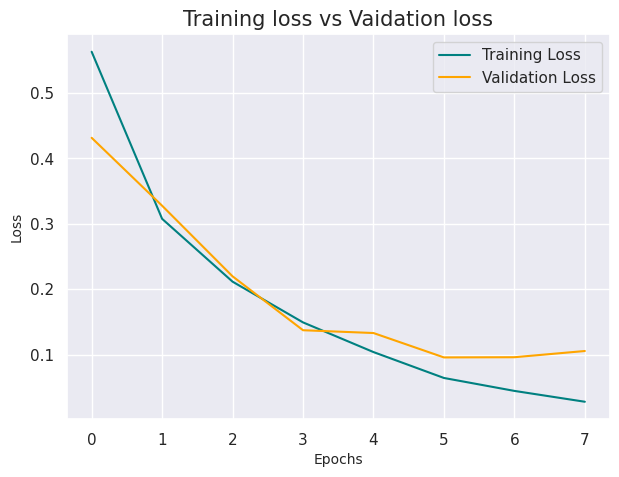

In [61]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Vaidation loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [62]:
model.evaluate(X_test_scaled, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9516 - loss: 0.1561


[0.11569143831729889, 0.9620000123977661]

In [63]:
y_p = model.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [64]:
y_pred = np.where(y_p >= 0.5, 1, 0)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       400
           1       0.97      0.97      0.97       600

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



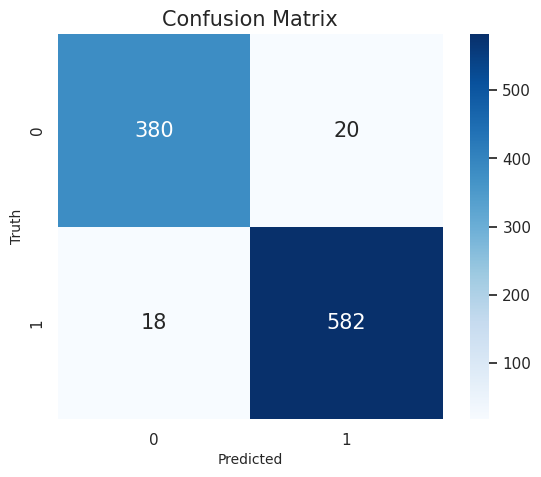

In [67]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()